In [352]:
import Pkg; 

Pkg.add("CSV") # install CSV
Pkg.add("DataFrames") # install Dataframes
Pkg.add("TimeSeries")
Pkg.add("Pandas")
Pkg.add("StatsPlots") # plotting dataframe

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
  Installed OpenBLAS_jll ───────────────── v0.3.10+0
  Installed IntelOpenMP_jll ────────────── v2018.0.3+0
  Installed Rmath ──────────────────────── v0.6.1
  Installed Ratios ─────────────────────── v0.4.0
  Installed StatsPlots ─────────────────── v0.14.13
  Installed StatsFuns ──────────────────── v0.9.5
  Installed FillArrays ─────────────────── v0.9.6
  Installed Distributions ──

In [353]:
# import libraries
using CSV;
using Dates;
using DataFrames;
using Statistics;
using TimeSeries;
using PyPlot;
using StatsPlots;

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


### 1. Exploratory Data Analysis (EDA)

In [333]:
df = CSV.File("../../database/hkex_ticks_day/hkex_0001.csv") |> DataFrame
print(first(df, 5)) # show first 5 rows

5×6 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Volume   │
│     │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │ Int64    │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1   │ 2000-01-04 │ 33.0375 │ 33.3678 │ 32.3767 │ 32.3767 │ 3194413  │
│ 2   │ 2000-01-05 │ 30.89   │ 31.3856 │ 29.9815 │ 30.1467 │ 6058531  │
│ 3   │ 2000-01-06 │ 30.3945 │ 30.5596 │ 28.0818 │ 28.66   │ 10440480 │
│ 4   │ 2000-01-07 │ 29.073  │ 29.4033 │ 28.5774 │ 29.2381 │ 6049796  │
│ 5   │ 2000-01-10 │ 30.2293 │ 30.7248 │ 29.4859 │ 29.4859 │ 5195405  │

In [334]:
print(last(df, 5)) # last 5 rows

5×6 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Volume  │
│     │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │ Int64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 2020-09-24 │ 46.3    │ 46.65   │ 46.0    │ 46.35   │ 4728562 │
│ 2   │ 2020-09-25 │ 46.1    │ 46.9    │ 46.05   │ 46.55   │ 3907163 │
│ 3   │ 2020-09-28 │ 46.85   │ 47.0    │ 46.4    │ 46.55   │ 4628062 │
│ 4   │ 2020-09-29 │ 46.25   │ 46.6    │ 46.1    │ 46.5    │ 5319638 │
│ 5   │ 2020-09-30 │ 46.15   │ 47.15   │ 46.15   │ 46.6    │ 6518072 │

In [335]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,2000-01-04,,2020-09-30,5180,,Date
2,Open,51.3261,14.33,48.2606,104.406,,,Float64
3,High,51.8139,14.69,48.7607,104.645,,,Float64
4,Low,50.7815,14.33,47.6,101.963,,,Float64
5,Close,51.2954,14.582,48.1273,103.03,,,Float64
6,Volume,7.05069e6,0,6.16829e6,80792271,,,Int64


In [336]:
CSV.write("test.csv", df) # save as csv

"test.csv"

In [337]:
names(df) # column names

6-element Array{String,1}:
 "Date"
 "Open"
 "High"
 "Low"
 "Close"
 "Volume"

In [338]:
show(df, allrows=true) 

5181×6 DataFrame
│ Row  │ Date       │ Open    │ High    │ Low     │ Close   │ Volume   │
│      │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │ Int64    │
├──────┼────────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ 1    │ 2000-01-04 │ 33.0375 │ 33.3678 │ 32.3767 │ 32.3767 │ 3194413  │
│ 2    │ 2000-01-05 │ 30.89   │ 31.3856 │ 29.9815 │ 30.1467 │ 6058531  │
│ 3    │ 2000-01-06 │ 30.3945 │ 30.5596 │ 28.0818 │ 28.66   │ 10440480 │
│ 4    │ 2000-01-07 │ 29.073  │ 29.4033 │ 28.5774 │ 29.2381 │ 6049796  │
│ 5    │ 2000-01-10 │ 30.2293 │ 30.7248 │ 29.4859 │ 29.4859 │ 5195405  │
│ 6    │ 2000-01-11 │ 30.2293 │ 30.5596 │ 29.5685 │ 30.2293 │ 6175861  │
│ 7    │ 2000-01-12 │ 29.7337 │ 30.477  │ 29.3207 │ 29.7337 │ 5453898  │
│ 8    │ 2000-01-13 │ 29.8989 │ 29.9815 │ 29.1556 │ 29.3207 │ 3499841  │
│ 9    │ 2000-01-14 │ 29.4033 │ 29.6511 │ 28.4948 │ 28.9078 │ 3903580  │
│ 10   │ 2000-01-17 │ 29.4033 │ 29.4033 │ 28.8252 │ 29.2381 │ 3106959  │
│ 11   │ 2000-01-18 │ 28.9904 │ 30

│ 110  │ 2000-06-05 │ 27.0803 │ 27.5849 │ 26.0711 │ 26.4075 │ 20152141 │
│ 111  │ 2000-06-06 │ 26.4075 │ 26.4075 │ 26.4075 │ 26.4075 │ 0        │
│ 112  │ 2000-06-07 │ 26.2393 │ 26.6598 │ 25.7347 │ 26.0711 │ 17358078 │
│ 113  │ 2000-06-08 │ 26.0711 │ 26.5757 │ 25.987  │ 26.2393 │ 10497928 │
│ 114  │ 2000-06-09 │ 26.2393 │ 27.2485 │ 25.987  │ 27.0803 │ 14625744 │
│ 115  │ 2000-06-12 │ 27.1644 │ 27.8372 │ 27.0803 │ 27.2485 │ 17643396 │
│ 116  │ 2000-06-13 │ 26.9121 │ 27.3327 │ 26.5757 │ 26.6598 │ 14620210 │
│ 117  │ 2000-06-14 │ 26.9121 │ 27.8372 │ 26.9121 │ 27.669  │ 12533831 │
│ 118  │ 2000-06-15 │ 28.2577 │ 28.4259 │ 27.9213 │ 28.2577 │ 14146355 │
│ 119  │ 2000-06-16 │ 28.5101 │ 29.4351 │ 28.2577 │ 29.3511 │ 18570132 │
│ 120  │ 2000-06-19 │ 29.267  │ 29.9397 │ 28.9306 │ 29.4351 │ 14577504 │
│ 121  │ 2000-06-20 │ 29.8556 │ 30.0238 │ 28.5101 │ 28.7623 │ 14953865 │
│ 122  │ 2000-06-21 │ 28.7623 │ 29.1828 │ 28.3418 │ 29.1828 │ 10614476 │
│ 123  │ 2000-06-22 │ 29.3511 │ 29.3511 │ 28.5101 │

│ 275  │ 2001-01-29 │ 35.1869 │ 35.1869 │ 34.5103 │ 34.8486 │ 6881828  │
│ 276  │ 2001-01-30 │ 34.8486 │ 35.0177 │ 33.8336 │ 34.0028 │ 8049243  │
│ 277  │ 2001-01-31 │ 34.3411 │ 35.0177 │ 34.0028 │ 35.0177 │ 8212608  │
│ 278  │ 2001-02-01 │ 34.6794 │ 35.1869 │ 34.5103 │ 35.0177 │ 6266717  │
│ 279  │ 2001-02-02 │ 35.1869 │ 35.1869 │ 34.3411 │ 34.6794 │ 4072461  │
│ 280  │ 2001-02-05 │ 34.1719 │ 34.8486 │ 34.1719 │ 34.3411 │ 4342803  │
│ 281  │ 2001-02-06 │ 34.6794 │ 35.0177 │ 34.3411 │ 34.5103 │ 4323649  │
│ 282  │ 2001-02-07 │ 34.5103 │ 34.8486 │ 34.5103 │ 34.8486 │ 4469175  │
│ 283  │ 2001-02-08 │ 34.3411 │ 34.5103 │ 34.0028 │ 34.1719 │ 4140513  │
│ 284  │ 2001-02-09 │ 34.0028 │ 34.3411 │ 33.8336 │ 33.8336 │ 3647718  │
│ 285  │ 2001-02-12 │ 33.6644 │ 33.749  │ 33.0723 │ 33.2415 │ 9090017  │
│ 286  │ 2001-02-13 │ 33.5798 │ 34.0028 │ 33.1569 │ 33.1569 │ 6478638  │
│ 287  │ 2001-02-14 │ 33.3261 │ 34.0028 │ 33.2415 │ 33.6644 │ 7130611  │
│ 288  │ 2001-02-15 │ 33.4107 │ 33.4953 │ 32.9877 │

│ 464  │ 2001-10-22 │ 22.3488 │ 22.6967 │ 22.1749 │ 22.4357 │ 3393543  │
│ 465  │ 2001-10-23 │ 22.9575 │ 23.4793 │ 22.8705 │ 23.3923 │ 4916692  │
│ 466  │ 2001-10-24 │ 23.3053 │ 23.5662 │ 23.0445 │ 23.3923 │ 5756115  │
│ 467  │ 2001-10-25 │ 23.3923 │ 23.3923 │ 23.3923 │ 23.3923 │ 0        │
│ 468  │ 2001-10-26 │ 23.4793 │ 23.6532 │ 23.3053 │ 23.3923 │ 4373892  │
│ 469  │ 2001-10-29 │ 23.3923 │ 23.4793 │ 22.7836 │ 23.3923 │ 5177946  │
│ 470  │ 2001-10-30 │ 22.6097 │ 23.3054 │ 22.6097 │ 23.2184 │ 3953707  │
│ 471  │ 2001-10-31 │ 22.9575 │ 23.0445 │ 22.6967 │ 22.9575 │ 3001487  │
│ 472  │ 2001-11-01 │ 23.0445 │ 23.2184 │ 22.7836 │ 23.1315 │ 2197631  │
│ 473  │ 2001-11-02 │ 23.3053 │ 23.4793 │ 22.7836 │ 22.9575 │ 2344344  │
│ 474  │ 2001-11-05 │ 23.0445 │ 23.6532 │ 22.9575 │ 23.6532 │ 4768091  │
│ 475  │ 2001-11-06 │ 23.8271 │ 24.0011 │ 23.3923 │ 23.5662 │ 4171849  │
│ 476  │ 2001-11-07 │ 23.8271 │ 23.9141 │ 23.3053 │ 23.3053 │ 3555947  │
│ 477  │ 2001-11-08 │ 23.8271 │ 24.088  │ 23.5662 │

│ 650  │ 2002-07-09 │ 23.8463 │ 23.9353 │ 23.4904 │ 23.6684 │ 10301061 │
│ 651  │ 2002-07-10 │ 23.4904 │ 23.8463 │ 23.4904 │ 23.7573 │ 3743579  │
│ 652  │ 2002-07-11 │ 23.4904 │ 23.5794 │ 22.9565 │ 23.2235 │ 6981453  │
│ 653  │ 2002-07-12 │ 23.3124 │ 23.6684 │ 23.1345 │ 23.4904 │ 4336619  │
│ 654  │ 2002-07-15 │ 23.3124 │ 23.7573 │ 23.2235 │ 23.6684 │ 2661195  │
│ 655  │ 2002-07-16 │ 23.4904 │ 23.6683 │ 22.8675 │ 22.9565 │ 7343239  │
│ 656  │ 2002-07-17 │ 22.8675 │ 22.9565 │ 22.1557 │ 22.4226 │ 8413759  │
│ 657  │ 2002-07-18 │ 22.7786 │ 22.8675 │ 22.6006 │ 22.8675 │ 4495144  │
│ 658  │ 2002-07-19 │ 22.6896 │ 22.6896 │ 22.4226 │ 22.5116 │ 3827249  │
│ 659  │ 2002-07-22 │ 22.0667 │ 22.0667 │ 21.7108 │ 21.7998 │ 5727112  │
│ 660  │ 2002-07-23 │ 21.6218 │ 22.6006 │ 21.5329 │ 22.6006 │ 12040702 │
│ 661  │ 2002-07-24 │ 22.0667 │ 22.1557 │ 21.4439 │ 21.6218 │ 9312620  │
│ 662  │ 2002-07-25 │ 22.3337 │ 22.4226 │ 20.999  │ 21.0879 │ 7982532  │
│ 663  │ 2002-07-26 │ 20.999  │ 21.2659 │ 20.4651 │

│ 820  │ 2003-03-04 │ 17.7504 │ 17.8945 │ 17.4624 │ 17.5704 │ 4319885  │
│ 821  │ 2003-03-05 │ 17.4264 │ 17.5704 │ 17.3183 │ 17.4624 │ 3659043  │
│ 822  │ 2003-03-06 │ 17.4624 │ 17.4624 │ 17.0303 │ 17.1023 │ 4848065  │
│ 823  │ 2003-03-07 │ 16.9223 │ 17.0663 │ 16.7783 │ 16.8143 │ 6252815  │
│ 824  │ 2003-03-10 │ 16.7423 │ 16.7423 │ 16.1302 │ 16.2022 │ 13391888 │
│ 825  │ 2003-03-11 │ 15.9502 │ 16.0222 │ 15.7701 │ 15.9142 │ 12664643 │
│ 826  │ 2003-03-12 │ 15.9862 │ 16.0942 │ 15.9142 │ 15.9862 │ 5581987  │
│ 827  │ 2003-03-13 │ 16.0222 │ 16.0222 │ 15.6621 │ 15.7342 │ 6323938  │
│ 828  │ 2003-03-14 │ 16.1662 │ 16.2742 │ 16.0582 │ 16.0942 │ 7778559  │
│ 829  │ 2003-03-17 │ 15.9502 │ 15.9502 │ 15.6981 │ 15.7701 │ 4966340  │
│ 830  │ 2003-03-18 │ 16.2382 │ 16.2743 │ 16.0222 │ 16.1662 │ 7647833  │
│ 831  │ 2003-03-19 │ 16.1662 │ 17.2464 │ 16.0222 │ 17.1384 │ 11436859 │
│ 832  │ 2003-03-20 │ 17.2103 │ 17.4264 │ 17.0303 │ 17.2464 │ 12662761 │
│ 833  │ 2003-03-21 │ 17.3544 │ 17.3544 │ 16.9223 │

│ 1014 │ 2003-12-01 │ 23.0914 │ 23.6569 │ 23.0914 │ 23.5626 │ 6521458  │
│ 1015 │ 2003-12-02 │ 23.7511 │ 23.7511 │ 23.2799 │ 23.3741 │ 8578655  │
│ 1016 │ 2003-12-03 │ 23.3741 │ 23.5626 │ 23.0914 │ 23.1856 │ 4783101  │
│ 1017 │ 2003-12-04 │ 23.2798 │ 23.2798 │ 22.6201 │ 22.8086 │ 4186614  │
│ 1018 │ 2003-12-05 │ 22.6201 │ 22.9029 │ 22.5259 │ 22.8086 │ 3671008  │
│ 1019 │ 2003-12-08 │ 22.6201 │ 22.6201 │ 22.2431 │ 22.3373 │ 4278596  │
│ 1020 │ 2003-12-09 │ 22.3373 │ 22.8087 │ 22.3373 │ 22.7144 │ 5043944  │
│ 1021 │ 2003-12-10 │ 22.4316 │ 22.7144 │ 22.4316 │ 22.5259 │ 4497908  │
│ 1022 │ 2003-12-11 │ 22.7144 │ 23.5626 │ 22.4316 │ 23.5626 │ 6340398  │
│ 1023 │ 2003-12-12 │ 23.5626 │ 23.7511 │ 23.4684 │ 23.6569 │ 7700253  │
│ 1024 │ 2003-12-15 │ 24.3166 │ 24.3166 │ 23.2799 │ 23.3741 │ 6933764  │
│ 1025 │ 2003-12-16 │ 23.1856 │ 23.3741 │ 22.7144 │ 22.8086 │ 7572037  │
│ 1026 │ 2003-12-17 │ 22.9971 │ 23.0914 │ 22.4316 │ 22.6201 │ 6412503  │
│ 1027 │ 2003-12-18 │ 22.6201 │ 22.8087 │ 22.5259 │

│ 1162 │ 2004-06-24 │ 21.4312 │ 22.2105 │ 21.4312 │ 22.1131 │ 8067894  │
│ 1163 │ 2004-06-25 │ 22.0157 │ 22.2105 │ 21.8209 │ 22.1131 │ 6167466  │
│ 1164 │ 2004-06-28 │ 22.0157 │ 22.5028 │ 21.9183 │ 22.3079 │ 6346053  │
│ 1165 │ 2004-06-29 │ 22.1131 │ 22.3079 │ 21.9183 │ 22.1131 │ 6292724  │
│ 1166 │ 2004-06-30 │ 22.2105 │ 22.6002 │ 22.2105 │ 22.4054 │ 7305143  │
│ 1167 │ 2004-07-01 │ 22.4054 │ 22.4054 │ 22.4054 │ 22.4054 │ 0        │
│ 1168 │ 2004-07-02 │ 21.8209 │ 22.6002 │ 21.8209 │ 22.4054 │ 6928552  │
│ 1169 │ 2004-07-05 │ 22.5028 │ 22.795  │ 22.4054 │ 22.6976 │ 3748089  │
│ 1170 │ 2004-07-06 │ 22.8924 │ 23.0872 │ 22.6002 │ 22.9899 │ 4940240  │
│ 1171 │ 2004-07-07 │ 22.795  │ 23.3795 │ 22.6002 │ 23.3795 │ 7942453  │
│ 1172 │ 2004-07-08 │ 22.9899 │ 23.3795 │ 22.6976 │ 22.6976 │ 7551955  │
│ 1173 │ 2004-07-09 │ 22.6976 │ 22.8924 │ 22.6002 │ 22.795  │ 6966649  │
│ 1174 │ 2004-07-12 │ 22.8924 │ 22.8924 │ 22.6002 │ 22.6976 │ 3634840  │
│ 1175 │ 2004-07-13 │ 22.795  │ 22.795  │ 22.2105 │

│ 1364 │ 2005-04-12 │ 27.784  │ 27.9803 │ 27.784  │ 27.9803 │ 2895730  │
│ 1365 │ 2005-04-13 │ 27.8822 │ 28.373  │ 27.8822 │ 28.2749 │ 5756982  │
│ 1366 │ 2005-04-14 │ 28.1767 │ 28.5694 │ 28.1767 │ 28.4712 │ 9807059  │
│ 1367 │ 2005-04-15 │ 28.1767 │ 28.4712 │ 28.0785 │ 28.2749 │ 9278466  │
│ 1368 │ 2005-04-18 │ 27.4895 │ 27.8821 │ 27.4895 │ 27.784  │ 9516618  │
│ 1369 │ 2005-04-19 │ 27.784  │ 27.9803 │ 27.784  │ 27.784  │ 5583771  │
│ 1370 │ 2005-04-20 │ 28.0785 │ 28.0785 │ 27.6858 │ 27.6858 │ 4470217  │
│ 1371 │ 2005-04-21 │ 27.6858 │ 28.0785 │ 27.5876 │ 27.8822 │ 8506458  │
│ 1372 │ 2005-04-22 │ 28.0785 │ 28.373  │ 28.0785 │ 28.2749 │ 6161755  │
│ 1373 │ 2005-04-25 │ 28.1767 │ 28.4712 │ 28.1767 │ 28.373  │ 7343776  │
│ 1374 │ 2005-04-26 │ 28.373  │ 28.7657 │ 28.373  │ 28.6675 │ 10890429 │
│ 1375 │ 2005-04-27 │ 28.5694 │ 28.8639 │ 28.4712 │ 28.7657 │ 6956743  │
│ 1376 │ 2005-04-28 │ 28.6676 │ 29.0602 │ 28.6676 │ 28.7657 │ 8265680  │
│ 1377 │ 2005-04-29 │ 28.7657 │ 28.9621 │ 28.5694 │

│ 1554 │ 2006-01-13 │ 33.7175 │ 34.2456 │ 33.7175 │ 34.2456 │ 8279236  │
│ 1555 │ 2006-01-16 │ 34.2253 │ 34.2253 │ 34.0628 │ 34.205  │ 6394136  │
│ 1556 │ 2006-01-17 │ 34.205  │ 34.3268 │ 33.4331 │ 33.4738 │ 9264423  │
│ 1557 │ 2006-01-18 │ 33.3925 │ 33.5753 │ 33.169  │ 33.494  │ 10612725 │
│ 1558 │ 2006-01-19 │ 33.7581 │ 34.0018 │ 33.6972 │ 33.9206 │ 10276691 │
│ 1559 │ 2006-01-20 │ 34.1846 │ 34.3065 │ 33.6972 │ 33.9206 │ 9436843  │
│ 1560 │ 2006-01-23 │ 33.4331 │ 33.555  │ 33.2706 │ 33.4128 │ 7461361  │
│ 1561 │ 2006-01-24 │ 33.5956 │ 33.6565 │ 33.494  │ 33.5956 │ 7635281  │
│ 1562 │ 2006-01-25 │ 33.6566 │ 33.6566 │ 33.23   │ 33.3519 │ 11220966 │
│ 1563 │ 2006-01-26 │ 33.3519 │ 33.3722 │ 33.2097 │ 33.3315 │ 5561006  │
│ 1564 │ 2006-01-27 │ 33.3315 │ 33.9003 │ 33.3315 │ 33.8393 │ 12525257 │
│ 1565 │ 2006-02-01 │ 33.8191 │ 33.9409 │ 33.494  │ 33.6159 │ 11727944 │
│ 1566 │ 2006-02-02 │ 33.5143 │ 33.6768 │ 33.4128 │ 33.5143 │ 6037272  │
│ 1567 │ 2006-02-03 │ 33.2706 │ 33.2706 │ 32.8238 │

│ 1743 │ 2006-10-18 │ 35.2802 │ 35.5321 │ 35.2382 │ 35.4691 │ 4344944  │
│ 1744 │ 2006-10-19 │ 35.4481 │ 35.553  │ 35.2802 │ 35.4481 │ 5365713  │
│ 1745 │ 2006-10-20 │ 35.4271 │ 35.8049 │ 35.4271 │ 35.8049 │ 5607085  │
│ 1746 │ 2006-10-23 │ 35.8888 │ 35.9098 │ 35.616  │ 35.7419 │ 4305212  │
│ 1747 │ 2006-10-24 │ 35.7629 │ 35.8679 │ 35.637  │ 35.658  │ 3828169  │
│ 1748 │ 2006-10-25 │ 35.637  │ 35.7209 │ 35.553  │ 35.553  │ 4674514  │
│ 1749 │ 2006-10-26 │ 35.7839 │ 35.8468 │ 35.637  │ 35.637  │ 4275521  │
│ 1750 │ 2006-10-27 │ 35.6789 │ 35.8679 │ 35.511  │ 35.616  │ 7874113  │
│ 1751 │ 2006-10-31 │ 35.616  │ 35.616  │ 35.2802 │ 35.595  │ 4276213  │
│ 1752 │ 2006-11-01 │ 35.4061 │ 35.4901 │ 35.2382 │ 35.3012 │ 3984613  │
│ 1753 │ 2006-11-02 │ 35.3012 │ 35.7419 │ 35.1753 │ 35.6789 │ 8952457  │
│ 1754 │ 2006-11-03 │ 35.658  │ 36.3086 │ 35.637  │ 36.2876 │ 11833194 │
│ 1755 │ 2006-11-06 │ 36.2036 │ 36.6024 │ 35.8888 │ 36.4974 │ 8387357  │
│ 1756 │ 2006-11-07 │ 37.0432 │ 37.6938 │ 36.9382 │

│ 1927 │ 2007-07-20 │ 49.0636 │ 49.3641 │ 48.3768 │ 48.9348 │ 9798580  │
│ 1928 │ 2007-07-23 │ 48.9348 │ 49.7075 │ 48.8489 │ 49.2353 │ 9194201  │
│ 1929 │ 2007-07-24 │ 49.6645 │ 49.965  │ 49.1494 │ 49.3641 │ 19622439 │
│ 1930 │ 2007-07-25 │ 48.9348 │ 49.965  │ 48.5056 │ 49.2353 │ 11566352 │
│ 1931 │ 2007-07-26 │ 49.2353 │ 49.2353 │ 47.7329 │ 47.7329 │ 9782269  │
│ 1932 │ 2007-07-27 │ 46.6598 │ 47.5183 │ 46.0159 │ 46.1447 │ 16679830 │
│ 1933 │ 2007-07-30 │ 45.6725 │ 47.0461 │ 45.6725 │ 46.8315 │ 9509780  │
│ 1934 │ 2007-07-31 │ 47.0032 │ 47.7329 │ 47.0032 │ 47.647  │ 6458549  │
│ 1935 │ 2007-08-01 │ 47.4324 │ 47.4324 │ 45.0715 │ 45.2003 │ 17265338 │
│ 1936 │ 2007-08-02 │ 45.7154 │ 46.1876 │ 44.5994 │ 45.93   │ 11966770 │
│ 1937 │ 2007-08-03 │ 46.1876 │ 46.2305 │ 45.4579 │ 45.7583 │ 8235650  │
│ 1938 │ 2007-08-06 │ 44.7281 │ 45.4579 │ 44.7281 │ 45.0286 │ 11020026 │
│ 1939 │ 2007-08-07 │ 45.5008 │ 45.5867 │ 44.6852 │ 45.1574 │ 7129439  │
│ 1940 │ 2007-08-08 │ 45.5008 │ 46.3593 │ 45.372  │

│ 2127 │ 2008-05-14 │ 53.4699 │ 54.2205 │ 52.9842 │ 53.9555 │ 5414410  │
│ 2128 │ 2008-05-15 │ 53.9555 │ 55.1477 │ 53.3815 │ 54.7503 │ 10620886 │
│ 2129 │ 2008-05-16 │ 55.81   │ 56.958  │ 55.6334 │ 56.7372 │ 26782752 │
│ 2130 │ 2008-05-19 │ 57.267  │ 57.8411 │ 56.958  │ 57.7086 │ 13468100 │
│ 2131 │ 2008-05-20 │ 57.7527 │ 57.7527 │ 55.6334 │ 55.8541 │ 9256889  │
│ 2132 │ 2008-05-21 │ 55.1919 │ 56.8255 │ 54.7503 │ 56.3398 │ 8532297  │
│ 2133 │ 2008-05-22 │ 54.8828 │ 55.81   │ 54.7504 │ 55.6334 │ 8756628  │
│ 2134 │ 2008-05-23 │ 56.0749 │ 56.1191 │ 54.7503 │ 54.8386 │ 7597956  │
│ 2135 │ 2008-05-26 │ 54.3088 │ 54.6178 │ 53.514  │ 53.8231 │ 10967236 │
│ 2136 │ 2008-05-27 │ 53.8231 │ 54.1763 │ 53.4257 │ 53.6023 │ 5762770  │
│ 2137 │ 2008-05-28 │ 53.3374 │ 53.9555 │ 53.0725 │ 53.1166 │ 6556929  │
│ 2138 │ 2008-05-29 │ 53.4257 │ 53.9114 │ 53.1166 │ 53.5582 │ 7532619  │
│ 2139 │ 2008-05-30 │ 53.8672 │ 53.8672 │ 52.6751 │ 52.94   │ 14367123 │
│ 2140 │ 2008-06-02 │ 53.0283 │ 54.8386 │ 53.0283 │

│ 2340 │ 2009-03-24 │ 31.1392 │ 31.7397 │ 30.2495 │ 31.5395 │ 12973098 │
│ 2341 │ 2009-03-25 │ 31.584  │ 31.9844 │ 31.028  │ 31.1836 │ 6941705  │
│ 2342 │ 2009-03-26 │ 31.6285 │ 32.229  │ 31.2726 │ 31.762  │ 8463654  │
│ 2343 │ 2009-03-27 │ 31.6285 │ 31.6285 │ 30.7833 │ 31.3616 │ 8904040  │
│ 2344 │ 2009-03-30 │ 30.85   │ 31.1392 │ 29.4932 │ 29.7601 │ 9670850  │
│ 2345 │ 2009-03-31 │ 29.6712 │ 30.1382 │ 29.5822 │ 29.6934 │ 8759533  │
│ 2346 │ 2009-04-01 │ 29.8046 │ 30.116  │ 29.1819 │ 29.56   │ 7417544  │
│ 2347 │ 2009-04-02 │ 30.0715 │ 32.0734 │ 30.0715 │ 32.0289 │ 13442190 │
│ 2348 │ 2009-04-03 │ 31.6063 │ 32.7851 │ 31.0725 │ 32.5627 │ 12125302 │
│ 2349 │ 2009-04-06 │ 34.2531 │ 34.5645 │ 32.6739 │ 33.5858 │ 9190770  │
│ 2350 │ 2009-04-07 │ 33.3634 │ 33.8972 │ 32.963  │ 33.8527 │ 6725242  │
│ 2351 │ 2009-04-08 │ 33.0075 │ 33.2077 │ 31.6953 │ 32.0066 │ 12713456 │
│ 2352 │ 2009-04-09 │ 31.9844 │ 33.141  │ 31.9399 │ 33.052  │ 6969002  │
│ 2353 │ 2009-04-14 │ 33.5858 │ 34.431  │ 32.9185 │

│ 2554 │ 2010-02-02 │ 43.501  │ 44.2183 │ 43.501  │ 43.663  │ 6277977  │
│ 2555 │ 2010-02-03 │ 43.8019 │ 44.0795 │ 43.4316 │ 43.8019 │ 6542522  │
│ 2556 │ 2010-02-04 │ 43.3853 │ 43.6861 │ 42.83   │ 43.0383 │ 5926415  │
│ 2557 │ 2010-02-05 │ 41.8813 │ 42.3441 │ 41.6499 │ 41.6962 │ 11960164 │
│ 2558 │ 2010-02-08 │ 41.6962 │ 42.1821 │ 41.3028 │ 41.9276 │ 5503515  │
│ 2559 │ 2010-02-09 │ 41.997  │ 42.8068 │ 41.9738 │ 42.6449 │ 5594429  │
│ 2560 │ 2010-02-10 │ 42.8068 │ 42.8068 │ 41.997  │ 42.5292 │ 4630069  │
│ 2561 │ 2010-02-11 │ 42.7143 │ 43.4316 │ 42.5755 │ 43.339  │ 4286791  │
│ 2562 │ 2010-02-12 │ 43.2696 │ 44.1489 │ 43.0614 │ 44.0332 │ 6468617  │
│ 2563 │ 2010-02-17 │ 44.5423 │ 44.7737 │ 44.0332 │ 44.2877 │ 5166151  │
│ 2564 │ 2010-02-18 │ 44.0332 │ 44.2877 │ 43.4779 │ 43.7093 │ 3409596  │
│ 2565 │ 2010-02-19 │ 43.2465 │ 43.2465 │ 42.159  │ 42.3904 │ 6365887  │
│ 2566 │ 2010-02-22 │ 43.2234 │ 43.6399 │ 43.0846 │ 43.4779 │ 6186056  │
│ 2567 │ 2010-02-23 │ 43.1077 │ 44.2414 │ 43.0151 │

│ 2725 │ 2010-10-13 │ 57.8545 │ 58.7705 │ 54.7207 │ 57.2277 │ 18342342 │
│ 2726 │ 2010-10-14 │ 57.8063 │ 58.9633 │ 57.4688 │ 58.9151 │ 8160834  │
│ 2727 │ 2010-10-15 │ 58.8187 │ 58.8187 │ 57.9509 │ 58.6741 │ 5400108  │
│ 2728 │ 2010-10-18 │ 58.8187 │ 58.8187 │ 57.0348 │ 57.7099 │ 6330135  │
│ 2729 │ 2010-10-19 │ 57.6134 │ 59.6865 │ 57.3724 │ 59.4937 │ 6937913  │
│ 2730 │ 2010-10-20 │ 57.8063 │ 59.6383 │ 57.8063 │ 59.5419 │ 7386813  │
│ 2731 │ 2010-10-21 │ 60.0722 │ 60.0722 │ 58.4812 │ 58.9151 │ 5836399  │
│ 2732 │ 2010-10-22 │ 58.2884 │ 59.349  │ 57.9026 │ 59.2044 │ 6354238  │
│ 2733 │ 2010-10-25 │ 59.6865 │ 59.783  │ 58.433  │ 58.6741 │ 4147102  │
│ 2734 │ 2010-10-26 │ 58.9151 │ 59.3973 │ 58.2402 │ 58.9633 │ 3604028  │
│ 2735 │ 2010-10-27 │ 58.5294 │ 59.2526 │ 57.6134 │ 57.8062 │ 5274516  │
│ 2736 │ 2010-10-28 │ 57.4205 │ 57.5652 │ 56.6973 │ 57.1313 │ 6519212  │
│ 2737 │ 2010-10-29 │ 57.4205 │ 57.4205 │ 56.6973 │ 56.8902 │ 6069243  │
│ 2738 │ 2010-11-01 │ 57.4205 │ 59.4937 │ 57.4205 │

│ 2914 │ 2011-07-22 │ 57.2812 │ 57.3308 │ 56.8345 │ 57.2316 │ 4155672  │
│ 2915 │ 2011-07-25 │ 56.8841 │ 57.7776 │ 56.7352 │ 57.4798 │ 3953589  │
│ 2916 │ 2011-07-26 │ 57.1323 │ 58.0754 │ 57.1323 │ 57.9265 │ 7171696  │
│ 2917 │ 2011-07-27 │ 57.579  │ 58.5718 │ 57.579  │ 58.4725 │ 5960362  │
│ 2918 │ 2011-07-28 │ 57.5791 │ 59.2171 │ 57.5791 │ 59.0682 │ 6225296  │
│ 2919 │ 2011-07-29 │ 59.0682 │ 59.9617 │ 58.8696 │ 59.1178 │ 7290372  │
│ 2920 │ 2011-08-01 │ 60.0609 │ 60.4084 │ 59.7135 │ 60.2595 │ 7108468  │
│ 2921 │ 2011-08-02 │ 59.366  │ 60.7558 │ 59.2171 │ 60.2098 │ 7956618  │
│ 2922 │ 2011-08-03 │ 59.366  │ 59.912  │ 58.6214 │ 59.4156 │ 9566111  │
│ 2923 │ 2011-08-04 │ 58.82   │ 59.6141 │ 58.6214 │ 59.366  │ 9549174  │
│ 2924 │ 2011-08-05 │ 55.3454 │ 56.3878 │ 54.6008 │ 55.6929 │ 21234826 │
│ 2925 │ 2011-08-08 │ 54.6008 │ 55.0475 │ 52.8139 │ 54.6008 │ 15141844 │
│ 2926 │ 2011-08-09 │ 51.6226 │ 53.8066 │ 49.3889 │ 52.3175 │ 21926339 │
│ 2927 │ 2011-08-10 │ 53.9059 │ 54.6008 │ 52.665  │

│ 3122 │ 2012-05-29 │ 45.8851 │ 47.1853 │ 45.8851 │ 47.1603 │ 5553776  │
│ 3123 │ 2012-05-30 │ 47.4621 │ 47.8784 │ 46.7335 │ 46.9156 │ 7209364  │
│ 3124 │ 2012-05-31 │ 46.5774 │ 46.8375 │ 46.0049 │ 46.5774 │ 6088232  │
│ 3125 │ 2012-06-01 │ 46.7855 │ 46.7855 │ 46.0309 │ 46.161  │ 5669346  │
│ 3126 │ 2012-06-04 │ 45.3283 │ 45.4584 │ 44.7559 │ 44.912  │ 7068294  │
│ 3127 │ 2012-06-05 │ 45.9008 │ 45.9268 │ 44.938  │ 45.0161 │ 5918440  │
│ 3128 │ 2012-06-06 │ 45.4584 │ 46.0309 │ 45.2763 │ 45.8227 │ 7335186  │
│ 3129 │ 2012-06-07 │ 47.0717 │ 47.0717 │ 46.4993 │ 46.5513 │ 8728799  │
│ 3130 │ 2012-06-08 │ 46.2391 │ 46.5774 │ 45.7707 │ 45.8227 │ 4553138  │
│ 3131 │ 2012-06-11 │ 46.9417 │ 47.1238 │ 46.6034 │ 47.0457 │ 4737998  │
│ 3132 │ 2012-06-12 │ 46.8375 │ 47.0457 │ 46.5253 │ 47.0197 │ 3093357  │
│ 3133 │ 2012-06-13 │ 46.7595 │ 47.0197 │ 46.3952 │ 46.9936 │ 2819303  │
│ 3134 │ 2012-06-14 │ 46.3952 │ 46.7595 │ 46.3952 │ 46.5774 │ 2794546  │
│ 3135 │ 2012-06-15 │ 47.0978 │ 48.607  │ 46.7335 │

│ 3326 │ 2013-03-27 │ 59.7329 │ 60.3616 │ 59.4708 │ 59.5757 │ 7217799  │
│ 3327 │ 2013-03-28 │ 60.0997 │ 60.152  │ 58.7897 │ 60.0472 │ 7979177  │
│ 3328 │ 2013-04-02 │ 60.0996 │ 60.5188 │ 59.3661 │ 60.4664 │ 6423463  │
│ 3329 │ 2013-04-03 │ 61.1476 │ 61.1476 │ 59.7852 │ 60.0472 │ 4182247  │
│ 3330 │ 2013-04-05 │ 59.3137 │ 59.89   │ 58.9469 │ 59.1041 │ 8502234  │
│ 3331 │ 2013-04-08 │ 58.4753 │ 59.1041 │ 58.0561 │ 58.4229 │ 5921591  │
│ 3332 │ 2013-04-09 │ 58.1609 │ 58.9469 │ 58.1609 │ 58.7373 │ 5316349  │
│ 3333 │ 2013-04-10 │ 58.842  │ 60.0996 │ 58.842  │ 59.7329 │ 7793836  │
│ 3334 │ 2013-04-11 │ 60.676  │ 60.676  │ 59.628  │ 59.9948 │ 4892867  │
│ 3335 │ 2013-04-12 │ 60.0472 │ 60.676  │ 59.7852 │ 60.2044 │ 3115214  │
│ 3336 │ 2013-04-15 │ 60.2568 │ 60.2568 │ 59.4708 │ 59.9948 │ 3033416  │
│ 3337 │ 2013-04-16 │ 59.8376 │ 61.7763 │ 59.4708 │ 60.5712 │ 6383912  │
│ 3338 │ 2013-04-17 │ 60.7808 │ 60.7808 │ 59.5757 │ 59.5757 │ 5572388  │
│ 3339 │ 2013-04-18 │ 59.2088 │ 60.0472 │ 59.1565 │

│ 3532 │ 2014-01-28 │ 63.8289 │ 63.9379 │ 62.7387 │ 63.7743 │ 4462822  │
│ 3533 │ 2014-01-29 │ 64.1559 │ 64.1559 │ 62.4116 │ 62.5752 │ 4619330  │
│ 3534 │ 2014-01-30 │ 62.0846 │ 62.8477 │ 61.9211 │ 62.6297 │ 3570334  │
│ 3535 │ 2014-02-04 │ 61.485  │ 63.0112 │ 61.4305 │ 62.6297 │ 7612149  │
│ 3536 │ 2014-02-05 │ 63.1203 │ 63.1747 │ 61.376  │ 61.7031 │ 5504606  │
│ 3537 │ 2014-02-06 │ 61.3215 │ 62.2481 │ 61.2125 │ 61.8121 │ 4030432  │
│ 3538 │ 2014-02-07 │ 61.6485 │ 62.3026 │ 61.2124 │ 61.594  │ 6090819  │
│ 3539 │ 2014-02-10 │ 61.9756 │ 62.1391 │ 60.9399 │ 61.4305 │ 4495014  │
│ 3540 │ 2014-02-11 │ 61.8666 │ 62.9567 │ 61.6485 │ 62.3027 │ 3717504  │
│ 3541 │ 2014-02-12 │ 62.8477 │ 64.0469 │ 62.0846 │ 63.5563 │ 5714049  │
│ 3542 │ 2014-02-13 │ 63.7743 │ 64.5375 │ 63.3928 │ 63.9924 │ 5529703  │
│ 3543 │ 2014-02-14 │ 65.137  │ 65.137  │ 64.0469 │ 64.4285 │ 4844308  │
│ 3544 │ 2014-02-17 │ 64.919  │ 65.137  │ 63.2838 │ 63.6108 │ 4606648  │
│ 3545 │ 2014-02-18 │ 63.5018 │ 64.5374 │ 63.3928 │

│ 3724 │ 2014-11-07 │ 76.1682 │ 77.0164 │ 75.8289 │ 76.5075 │ 2961146  │
│ 3725 │ 2014-11-10 │ 79.1656 │ 79.448  │ 77.9212 │ 78.3735 │ 6833264  │
│ 3726 │ 2014-11-11 │ 79.2779 │ 79.2779 │ 77.4123 │ 78.1473 │ 4446176  │
│ 3727 │ 2014-11-12 │ 78.0343 │ 78.2039 │ 77.4122 │ 78.0908 │ 3056375  │
│ 3728 │ 2014-11-13 │ 78.4301 │ 78.7694 │ 78.0343 │ 78.5997 │ 3525601  │
│ 3729 │ 2014-11-14 │ 79.5042 │ 79.7305 │ 78.9955 │ 79.3911 │ 3745490  │
│ 3730 │ 2014-11-17 │ 80.2962 │ 80.4093 │ 78.7694 │ 78.8825 │ 3087120  │
│ 3731 │ 2014-11-18 │ 78.8259 │ 79.3911 │ 78.0908 │ 78.1473 │ 3303019  │
│ 3732 │ 2014-11-19 │ 78.3735 │ 78.3735 │ 77.5819 │ 77.7515 │ 2695280  │
│ 3733 │ 2014-11-20 │ 78.4301 │ 78.4301 │ 77.7515 │ 77.9212 │ 2470047  │
│ 3734 │ 2014-11-21 │ 77.5254 │ 78.2039 │ 77.4122 │ 78.0908 │ 2010192  │
│ 3735 │ 2014-11-24 │ 78.5997 │ 81.2574 │ 78.5997 │ 80.8618 │ 9235226  │
│ 3736 │ 2014-11-25 │ 80.3523 │ 81.3706 │ 80.24   │ 81.2013 │ 4655592  │
│ 3737 │ 2014-11-26 │ 80.8618 │ 81.71   │ 80.4093 │

│ 3922 │ 2015-08-27 │ 86.1412 │ 87.8992 │ 85.3878 │ 86.9784 │ 11653354 │
│ 3923 │ 2015-08-28 │ 89.4061 │ 89.4061 │ 87.4806 │ 87.5644 │ 12067936 │
│ 3924 │ 2015-08-31 │ 88.5689 │ 88.5689 │ 85.4715 │ 86.4761 │ 6308932  │
│ 3925 │ 2015-09-01 │ 85.8064 │ 86.7272 │ 84.467  │ 84.7181 │ 7067486  │
│ 3926 │ 2015-09-02 │ 84.8018 │ 86.6435 │ 84.5507 │ 85.8901 │ 7448068  │
│ 3927 │ 2015-09-04 │ 87.0621 │ 87.0621 │ 83.9647 │ 85.3878 │ 6967287  │
│ 3928 │ 2015-09-07 │ 84.9692 │ 86.0575 │ 84.2158 │ 84.5507 │ 4919908  │
│ 3929 │ 2015-09-08 │ 84.7181 │ 87.7318 │ 84.1321 │ 86.7272 │ 6639050  │
│ 3930 │ 2015-09-09 │ 88.7363 │ 93.5917 │ 88.7363 │ 92.0012 │ 18049486 │
│ 3931 │ 2015-09-10 │ 91.164  │ 91.2477 │ 89.7409 │ 90.4943 │ 6489457  │
│ 3932 │ 2015-09-11 │ 90.9966 │ 91.6663 │ 87.5644 │ 87.8155 │ 9022013  │
│ 3933 │ 2015-09-14 │ 87.8155 │ 88.9038 │ 87.2295 │ 88.0666 │ 6544682  │
│ 3934 │ 2015-09-15 │ 87.9829 │ 88.1503 │ 86.6435 │ 87.2295 │ 6375199  │
│ 3935 │ 2015-09-16 │ 88.1504 │ 89.3223 │ 87.3132 │

│ 4130 │ 2016-07-05 │ 72.3809 │ 72.4239 │ 71.3057 │ 71.3917 │ 11090522 │
│ 4131 │ 2016-07-06 │ 70.5316 │ 70.9617 │ 69.4564 │ 70.8757 │ 12119758 │
│ 4132 │ 2016-07-07 │ 71.6498 │ 71.7358 │ 71.0907 │ 71.6928 │ 5117938  │
│ 4133 │ 2016-07-08 │ 71.3917 │ 71.3917 │ 70.3596 │ 70.4456 │ 9496882  │
│ 4134 │ 2016-07-11 │ 71.3487 │ 72.0798 │ 70.6606 │ 71.0477 │ 6480086  │
│ 4135 │ 2016-07-12 │ 71.5638 │ 73.3271 │ 71.3917 │ 72.897  │ 12355881 │
│ 4136 │ 2016-07-13 │ 73.5421 │ 74.1012 │ 73.3701 │ 73.9292 │ 11973820 │
│ 4137 │ 2016-07-14 │ 74.1872 │ 74.4882 │ 73.4131 │ 74.3592 │ 6476404  │
│ 4138 │ 2016-07-15 │ 74.7893 │ 75.3054 │ 74.0582 │ 74.8753 │ 7071019  │
│ 4139 │ 2016-07-18 │ 74.7893 │ 75.6924 │ 74.4022 │ 75.5204 │ 5620696  │
│ 4140 │ 2016-07-19 │ 75.4344 │ 75.7355 │ 74.7893 │ 75.5634 │ 4470626  │
│ 4141 │ 2016-07-20 │ 74.5743 │ 75.6494 │ 74.5743 │ 75.3054 │ 7859835  │
│ 4142 │ 2016-07-21 │ 75.6924 │ 76.9827 │ 75.1334 │ 76.7246 │ 8890410  │
│ 4143 │ 2016-07-22 │ 75.9935 │ 76.3806 │ 75.7785 │

│ 4338 │ 2017-05-09 │ 84.9045 │ 85.5109 │ 84.2114 │ 85.2943 │ 6147893  │
│ 4339 │ 2017-05-10 │ 85.8142 │ 87.3303 │ 85.4676 │ 87.2437 │ 10329868 │
│ 4340 │ 2017-05-11 │ 87.5036 │ 89.0631 │ 87.4169 │ 88.2833 │ 7770669  │
│ 4341 │ 2017-05-12 │ 88.37   │ 88.37   │ 87.4169 │ 88.0234 │ 4955540  │
│ 4342 │ 2017-05-15 │ 88.37   │ 89.0631 │ 87.9368 │ 88.8031 │ 10685032 │
│ 4343 │ 2017-05-16 │ 88.9312 │ 89.1961 │ 88.0481 │ 88.8429 │ 5340714  │
│ 4344 │ 2017-05-17 │ 88.7546 │ 89.1078 │ 88.578  │ 89.0195 │ 4707736  │
│ 4345 │ 2017-05-18 │ 88.1364 │ 88.4896 │ 87.1649 │ 87.5182 │ 6702439  │
│ 4346 │ 2017-05-19 │ 88.2247 │ 88.2247 │ 87.1208 │ 87.9598 │ 2912419  │
│ 4347 │ 2017-05-22 │ 89.1961 │ 89.1961 │ 87.6948 │ 88.0039 │ 4086909  │
│ 4348 │ 2017-05-23 │ 87.9598 │ 88.6663 │ 87.739  │ 88.5779 │ 5539687  │
│ 4349 │ 2017-05-24 │ 88.8429 │ 90.0793 │ 88.4896 │ 89.8143 │ 6114259  │
│ 4350 │ 2017-05-25 │ 89.8143 │ 90.4325 │ 89.4611 │ 89.8143 │ 5828303  │
│ 4351 │ 2017-05-26 │ 90.5208 │ 90.5208 │ 89.2844 │

│ 4534 │ 2018-02-15 │ 87.2157 │ 88.1056 │ 87.2157 │ 88.0611 │ 3716540  │
│ 4535 │ 2018-02-20 │ 88.9066 │ 88.9066 │ 86.7707 │ 87.0822 │ 3753917  │
│ 4536 │ 2018-02-21 │ 87.3492 │ 87.7496 │ 86.5482 │ 87.7051 │ 4128242  │
│ 4537 │ 2018-02-22 │ 88.1056 │ 88.1056 │ 87.2157 │ 87.6606 │ 4261057  │
│ 4538 │ 2018-02-23 │ 87.8386 │ 88.5951 │ 87.6161 │ 88.3726 │ 3114261  │
│ 4539 │ 2018-02-26 │ 88.3281 │ 89.7075 │ 88.1056 │ 89.0846 │ 4830552  │
│ 4540 │ 2018-02-27 │ 89.4405 │ 89.4405 │ 88.1946 │ 88.3281 │ 2802839  │
│ 4541 │ 2018-02-28 │ 88.9956 │ 88.9956 │ 87.1267 │ 87.2157 │ 6080646  │
│ 4542 │ 2018-03-01 │ 85.9252 │ 87.2602 │ 85.9252 │ 87.2602 │ 5071189  │
│ 4543 │ 2018-03-02 │ 86.4592 │ 86.7707 │ 86.1032 │ 86.6817 │ 4087621  │
│ 4544 │ 2018-03-05 │ 86.4147 │ 86.8597 │ 84.5458 │ 84.7238 │ 5522013  │
│ 4545 │ 2018-03-06 │ 85.5692 │ 86.3702 │ 85.3023 │ 85.4358 │ 4575359  │
│ 4546 │ 2018-03-07 │ 85.4357 │ 85.5692 │ 84.6793 │ 84.8128 │ 4946917  │
│ 4547 │ 2018-03-08 │ 85.0798 │ 86.3257 │ 84.8128 │

│ 4735 │ 2018-12-11 │ 68.9717 │ 71.0395 │ 68.9717 │ 70.9936 │ 7018819  │
│ 4736 │ 2018-12-12 │ 71.9585 │ 72.5099 │ 71.7288 │ 72.464  │ 6923977  │
│ 4737 │ 2018-12-13 │ 72.5099 │ 72.9694 │ 72.2802 │ 72.5099 │ 5506259  │
│ 4738 │ 2018-12-14 │ 72.1423 │ 72.8316 │ 71.7288 │ 72.7856 │ 5156938  │
│ 4739 │ 2018-12-17 │ 73.0154 │ 73.383  │ 72.418  │ 73.1992 │ 4610711  │
│ 4740 │ 2018-12-18 │ 72.8775 │ 73.5668 │ 71.7288 │ 71.8207 │ 4511160  │
│ 4741 │ 2018-12-19 │ 72.6018 │ 72.8316 │ 72.1423 │ 72.1883 │ 4456229  │
│ 4742 │ 2018-12-20 │ 72.418  │ 72.7856 │ 70.7638 │ 71.3612 │ 4260894  │
│ 4743 │ 2018-12-21 │ 69.9367 │ 70.3043 │ 69.5231 │ 70.1205 │ 12677309 │
│ 4744 │ 2018-12-24 │ 69.2474 │ 69.9826 │ 69.1096 │ 69.7988 │ 2428189  │
│ 4745 │ 2018-12-27 │ 69.615  │ 70.2583 │ 69.1096 │ 69.2474 │ 3805125  │
│ 4746 │ 2018-12-28 │ 68.9717 │ 69.3853 │ 68.6041 │ 69.2474 │ 4368603  │
│ 4747 │ 2018-12-31 │ 69.8448 │ 69.8448 │ 69.0636 │ 69.1096 │ 2075395  │
│ 4748 │ 2019-01-02 │ 69.1555 │ 69.3393 │ 68.0987 │

│ 4944 │ 2019-10-21 │ 69.7674 │ 70.151  │ 68.9522 │ 69.9112 │ 3397252  │
│ 4945 │ 2019-10-22 │ 69.3838 │ 70.7743 │ 69.3838 │ 70.3428 │ 4289730  │
│ 4946 │ 2019-10-23 │ 70.103  │ 70.1989 │ 68.9043 │ 69.2399 │ 4605530  │
│ 4947 │ 2019-10-24 │ 69.2399 │ 69.8153 │ 69.144  │ 69.8153 │ 4834951  │
│ 4948 │ 2019-10-25 │ 69.2879 │ 69.4797 │ 68.8563 │ 69.2399 │ 4194981  │
│ 4949 │ 2019-10-28 │ 68.8084 │ 69.3358 │ 68.6645 │ 68.9043 │ 6479596  │
│ 4950 │ 2019-10-29 │ 68.9522 │ 69.3838 │ 68.6645 │ 68.9522 │ 4424647  │
│ 4951 │ 2019-10-30 │ 69.192  │ 69.8153 │ 68.7125 │ 68.9522 │ 3437567  │
│ 4952 │ 2019-10-31 │ 68.4727 │ 69.5276 │ 68.4727 │ 69.5276 │ 4956512  │
│ 4953 │ 2019-11-01 │ 68.8084 │ 69.8153 │ 68.8084 │ 69.8153 │ 2784249  │
│ 4954 │ 2019-11-04 │ 69.8153 │ 70.7264 │ 69.7674 │ 70.5346 │ 4254929  │
│ 4955 │ 2019-11-05 │ 70.7743 │ 71.4456 │ 70.5825 │ 71.0141 │ 4045702  │
│ 4956 │ 2019-11-06 │ 70.4866 │ 71.9251 │ 70.4866 │ 71.6854 │ 4049632  │
│ 4957 │ 2019-11-07 │ 71.1579 │ 72.3567 │ 71.1579 │

│ 5140 │ 2020-08-04 │ 50.028  │ 51.3121 │ 49.7317 │ 51.0651 │ 8260594  │
│ 5141 │ 2020-08-05 │ 50.8676 │ 51.1145 │ 50.3737 │ 50.6207 │ 7515328  │
│ 5142 │ 2020-08-06 │ 50.8676 │ 50.9664 │ 49.386  │ 50.275  │ 5395197  │
│ 5143 │ 2020-08-07 │ 49.5835 │ 49.7317 │ 48.6452 │ 49.1885 │ 9781651  │
│ 5144 │ 2020-08-10 │ 49.3366 │ 49.5835 │ 49.0403 │ 49.1885 │ 4417692  │
│ 5145 │ 2020-08-11 │ 49.8799 │ 50.8676 │ 49.6329 │ 50.5219 │ 8633891  │
│ 5146 │ 2020-08-12 │ 50.4725 │ 51.9047 │ 50.2256 │ 51.8059 │ 9405826  │
│ 5147 │ 2020-08-13 │ 51.9541 │ 51.9541 │ 51.0157 │ 51.6578 │ 6771640  │
│ 5148 │ 2020-08-14 │ 50.917  │ 51.6084 │ 50.917  │ 51.3614 │ 4483075  │
│ 5149 │ 2020-08-17 │ 51.6084 │ 52.1022 │ 51.2627 │ 51.7071 │ 4221747  │
│ 5150 │ 2020-08-18 │ 51.8553 │ 51.9541 │ 51.1639 │ 51.5096 │ 5234128  │
│ 5151 │ 2020-08-19 │ 51.9047 │ 51.9047 │ 50.5713 │ 51.1145 │ 3302793  │
│ 5152 │ 2020-08-20 │ 51.1639 │ 51.1639 │ 49.4848 │ 49.9292 │ 7184232  │
│ 5153 │ 2020-08-21 │ 50.3737 │ 50.9664 │ 50.028  │

In [339]:
propertynames(df)

6-element Array{Symbol,1}:
 :Date
 :Open
 :High
 :Low
 :Close
 :Volume

In [340]:
# select row within date range
    
#=dates = [Date(2017, 1),Date(2018)];
yms = [yearmonth(d) for d in dates];
print(yms)

print(df[in(yms).(yearmonth.(df.Date)), :])

df = df[in(yms).(yearmonth.(df.Date)), :]=#

#getindex(df, '2017')

#df.loc[Date(2017, 1) : Date(2019, 1)]

#print(Dates.year(df.Date[1]))

df = df[(df.Date .> Date(2017, 1)) .& (df.Date .< Date(2019, 1)), :]

# last(df_test, 5)

,Date,Open,High,Low,Close,Volume
,Date,Float64,Float64,Float64,Float64,Int64
1,2017-01-03,76.9772,78.6666,76.2407,78.6666,5620699
2,2017-01-04,78.7965,78.8832,77.4103,78.1034,3966484
3,2017-01-05,79.0565,79.0565,78.0168,78.58,3496704
4,2017-01-06,78.7532,78.7965,77.6269,78.1034,5549846
5,2017-01-09,78.8399,78.8399,77.7136,77.9735,4810131
6,2017-01-10,77.8002,78.7965,77.8002,78.7965,4893132
7,2017-01-11,78.6666,80.1394,78.4933,79.9228,5943878
8,2017-01-12,80.0528,80.0528,79.0998,79.3597,4247629
9,2017-01-13,79.2731,79.8362,79.0131,79.7496,4235011


In [341]:
close = select(df, :Close) # select column
date = select(df, :Date)

print(first(close, 5)) 

5×1 DataFrame
│ Row │ Close   │
│     │ Float64 │
├─────┼─────────┤
│ 1   │ 78.6666 │
│ 2   │ 78.1034 │
│ 3   │ 78.58   │
│ 4   │ 78.1034 │
│ 5   │ 77.9735 │

### 2. Building trading strategy

In [342]:
function rolling_sum(a, n::Int)
    @assert 1<=n<=length(a)
    out = similar(a, length(a)-n+1)
    out[1] = sum(a[1:n])
    for i in eachindex(out)[2:end]
        out[i] = out[i-1]-a[i-1]+a[i+n-1]
    end
    return out
end

# threaded
function trolling_sum(a, n::Int)
    @assert 1<=n<=length(a)
    nseg=4
    if nseg*n >= length(a)
        return rolling_sum(a,n)
    else
        out = similar(a, length(a)-n+1)
        lseg = (length(out)-1)÷nseg+1
        segments = [(i*lseg+1, min(length(out),(i+1)*lseg)) for i in 0:nseg-1]
        Threads.@threads for (start, stop) in segments
            out[start] = sum(a[start:start+n-1])
            for i in start+1:stop
                out[i] = out[i-1]-a[i-1]+a[i+n-1]
            end
        end
        return out
    end
end

trolling_sum (generic function with 1 method)

In [343]:
# Initialize the `signals` DataFrame with the `signal` column
signals = DataFrame()
append!(signals, date)

# signals = deepcopy(df)

# add new column with zeros, named "signal"
insertcols!(signals, 1, (:signal=> 0 * nrow(signals)))

print(signals)

493×2 DataFrame
│ Row │ signal │ Date       │
│     │ Int64  │ Date       │
├─────┼────────┼────────────┤
│ 1   │ 0      │ 2017-01-03 │
│ 2   │ 0      │ 2017-01-04 │
│ 3   │ 0      │ 2017-01-05 │
│ 4   │ 0      │ 2017-01-06 │
│ 5   │ 0      │ 2017-01-09 │
│ 6   │ 0      │ 2017-01-10 │
│ 7   │ 0      │ 2017-01-11 │
│ 8   │ 0      │ 2017-01-12 │
│ 9   │ 0      │ 2017-01-13 │
│ 10  │ 0      │ 2017-01-16 │
│ 11  │ 0      │ 2017-01-17 │
│ 12  │ 0      │ 2017-01-18 │
│ 13  │ 0      │ 2017-01-19 │
│ 14  │ 0      │ 2017-01-20 │
│ 15  │ 0      │ 2017-01-23 │
│ 16  │ 0      │ 2017-01-24 │
│ 17  │ 0      │ 2017-01-25 │
│ 18  │ 0      │ 2017-01-26 │
│ 19  │ 0      │ 2017-01-27 │
│ 20  │ 0      │ 2017-02-01 │
│ 21  │ 0      │ 2017-02-02 │
│ 22  │ 0      │ 2017-02-03 │
│ 23  │ 0      │ 2017-02-06 │
│ 24  │ 0      │ 2017-02-07 │
│ 25  │ 0      │ 2017-02-08 │
│ 26  │ 0      │ 2017-02-09 │
│ 27  │ 0      │ 2017-02-10 │
│ 28  │ 0      │ 2017-02-13 │
│ 29  │ 0      │ 2017-02-14 │
│ 30  │ 0      │ 2017-02

│ 306 │ 0      │ 2018-03-27 │
│ 307 │ 0      │ 2018-03-28 │
│ 308 │ 0      │ 2018-03-29 │
│ 309 │ 0      │ 2018-04-03 │
│ 310 │ 0      │ 2018-04-04 │
│ 311 │ 0      │ 2018-04-06 │
│ 312 │ 0      │ 2018-04-09 │
│ 313 │ 0      │ 2018-04-10 │
│ 314 │ 0      │ 2018-04-11 │
│ 315 │ 0      │ 2018-04-12 │
│ 316 │ 0      │ 2018-04-13 │
│ 317 │ 0      │ 2018-04-16 │
│ 318 │ 0      │ 2018-04-17 │
│ 319 │ 0      │ 2018-04-18 │
│ 320 │ 0      │ 2018-04-19 │
│ 321 │ 0      │ 2018-04-20 │
│ 322 │ 0      │ 2018-04-23 │
│ 323 │ 0      │ 2018-04-24 │
│ 324 │ 0      │ 2018-04-25 │
│ 325 │ 0      │ 2018-04-26 │
│ 326 │ 0      │ 2018-04-27 │
│ 327 │ 0      │ 2018-04-30 │
│ 328 │ 0      │ 2018-05-02 │
│ 329 │ 0      │ 2018-05-03 │
│ 330 │ 0      │ 2018-05-04 │
│ 331 │ 0      │ 2018-05-07 │
│ 332 │ 0      │ 2018-05-08 │
│ 333 │ 0      │ 2018-05-09 │
│ 334 │ 0      │ 2018-05-10 │
│ 335 │ 0      │ 2018-05-11 │
│ 336 │ 0      │ 2018-05-14 │
│ 337 │ 0      │ 2018-05-15 │
│ 338 │ 0      │ 2018-05-16 │
│ 339 │ 0 

In [344]:
# Code ref: https://github.com/dysonance/Indicators.jl

function runmean(x::Vector{T}; n::Int=10, cumulative::Bool=true)::Vector{Float64} where {T<:Real}
    @assert n<size(x,1) && n>1 "Argument n is out of bounds."
    out = zeros(size(x,1))
    out[1:n-1] .= NaN
    if cumulative
        fi = 1.0:size(x,1)
        @inbounds for i in n:size(x,1)
            out[i] = sum(x[1:i])/fi[i]
        end
    else
        # original shorter but slower version of the code below
        # @inbounds for i = n:size(x,1)
        #     out[i] = mean(x[i-n+1:i])
        # end
        n_current = 0
        s::T = 0
        @inbounds for i = 1:n
            if isfinite(x[i])
                s += x[i]
                n_current += 1
            end
        end
        out[n] = n_current == n ? s / n : NaN
        @inbounds for i = n+1:size(x,1)
            if isfinite(x[i])
                s += x[i]
                n_current += 1
            end
            if isfinite(x[i-n])
                s -= x[i-n]
                n_current -= 1
            end
            out[i] = (n_current == n) ? s / n_current : NaN
        end
    end
    return out
end

function sma(x::Array{T}; n::Int64=10)::Array{Float64} where {T<:Real}
    return runmean(x, n=n, cumulative=false)
end

sma (generic function with 4 methods)

In [345]:
close_vec = vec(convert(Array, close))
# println(typeof(close_array))

short_mavg = sma(close_vec,n=40)
insertcols!(signals, 1, (short_mavg = short_mavg))

long_mavg = sma(close_vec,n=100)
insertcols!(signals, 1, (long_mavg = long_mavg))

,long_mavg,short_mavg,signal,Date
,Float64,Float64,Int64,Date
1,NaN,NaN,0,2017-01-03
2,NaN,NaN,0,2017-01-04
3,NaN,NaN,0,2017-01-05
4,NaN,NaN,0,2017-01-06
5,NaN,NaN,0,2017-01-09
6,NaN,NaN,0,2017-01-10
7,NaN,NaN,0,2017-01-11
8,NaN,NaN,0,2017-01-12
9,NaN,NaN,0,2017-01-13


In [346]:
print(last(signals, 5))

5×4 DataFrame
│ Row │ long_mavg │ short_mavg │ signal │ Date       │
│     │ Float64   │ Float64    │ Int64  │ Date       │
├─────┼───────────┼────────────┼────────┼────────────┤
│ 1   │ 77.351    │ 73.6415    │ 0      │ 2018-12-21 │
│ 2   │ 77.2767   │ 73.5725    │ 0      │ 2018-12-24 │
│ 3   │ 77.2151   │ 73.5082    │ 0      │ 2018-12-27 │
│ 4   │ 77.143    │ 73.4255    │ 0      │ 2018-12-28 │
│ 5   │ 77.0436   │ 73.3301    │ 0      │ 2018-12-31 │

In [347]:
# replace!(df.signal, "None" => "c")

#signals.signal .= ifelse.(signals.short_mavg .> signals.long_mavg, 1.0, signals.signal)
#df[df.a .< 5, :b] .= 2
signals[signals.short_mavg .> signals.long_mavg, :signal] .= 1.0

last(signals, 70)

,long_mavg,short_mavg,signal,Date
,Float64,Float64,Int64,Date
1,79.9521,80.8015,1,2018-09-18
2,79.9757,81.0004,1,2018-09-19
3,79.9934,81.1868,1,2018-09-20
4,79.9975,81.3433,1,2018-09-21
5,80.0001,81.4667,1,2018-09-24
6,80.0134,81.6039,1,2018-09-26
7,80.0271,81.7375,1,2018-09-27
8,80.0466,81.9247,1,2018-09-28
9,80.0328,82.0168,1,2018-10-02


In [348]:
signals.positions .= signals.signal.diff()

# Print `signals`
print(signals)

LoadError: ArgumentError: column name :positions not found in the data frame

In [349]:
function row_diff(arr)
    diff = [0] # first row has no diff
    for i in 2:(length(arr))
        push!(diff, arr[i] - arr[i-1])
    end
    return diff
end

signal_tmp = select(signals, :signal) # select column
signal_vec = vec(convert(Array, signal_tmp))
#print(typeof(signal_vec))

row_diff(signal_vec)

493-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

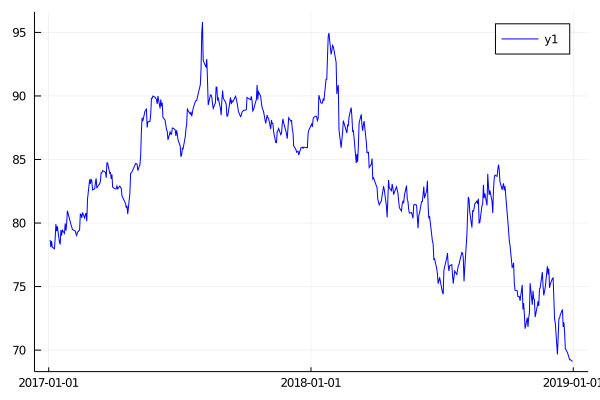

In [355]:
import StatsPlots
const st = StatsPlots

#plot(t, sma(Close,n=40), c=[1,0.5,0], label="SMA (40)")
@df df st.plot(:Date, :Close, color = :blue)